In [ ]:
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

<bound method Figure.show of <Figure size 2000x2000 with 16 Axes>>

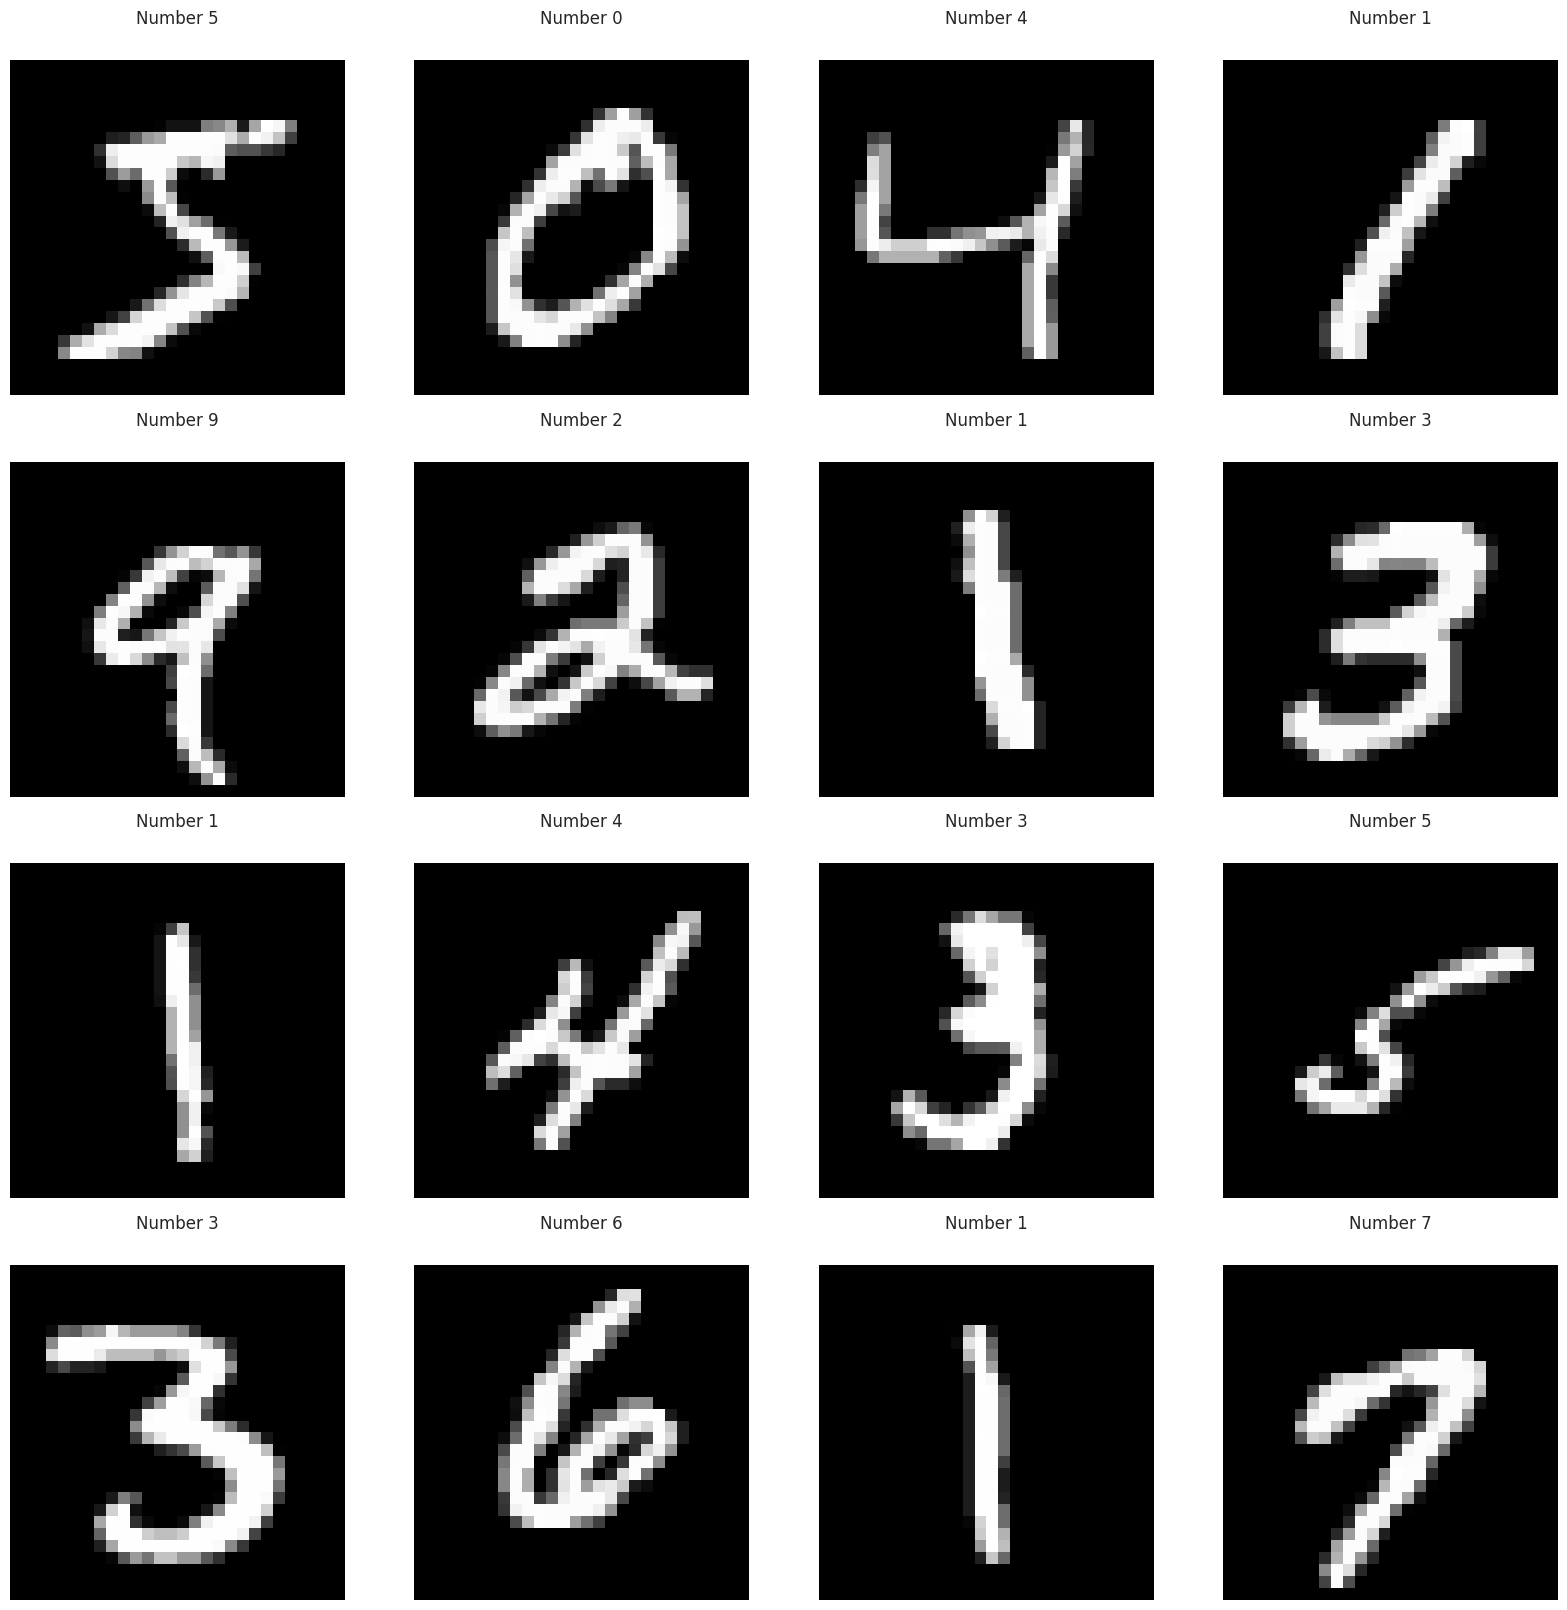

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(4, 4, figsize = (20,20))
plt.gray()
for i, ax in enumerate(axes.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train_shape: ',x_train.shape)

print('No of image in X Train', x_train.shape[0])

print('No of image in X Test', x_test.shape[0])

x_train_shape:  (60000, 28, 28, 1)
No of image in X Train 60000
No of image in X Test 10000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout


In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2013 - accuracy: 0.9390
Epoch 2/3
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0807 - accuracy: 0.9754
Epoch 3/3
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0602 - accuracy: 0.9816


In [ ]:
pred = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0498 - accuracy: 0.9848
